<a href="https://colab.research.google.com/github/Shivang2003/Machine-Learning-Problems/blob/main/Titanic_shipwreck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data=pd.read_csv("tested.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
data.shape

(5268, 14)

Detecting null values

In [ ]:
data.isnull().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

Dropping null values

In [ ]:
data.drop(data[data['Age'].isnull()].index, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


Data visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


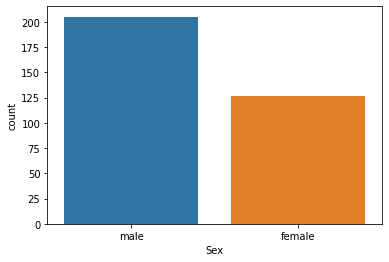

In [ ]:
sns.countplot(data['Sex'])

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <a list of 10 Patch objects>)

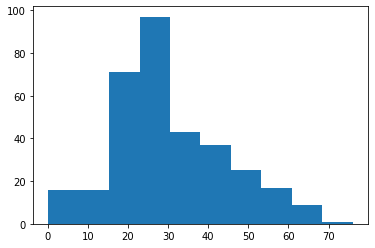

In [ ]:
plt.hist(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


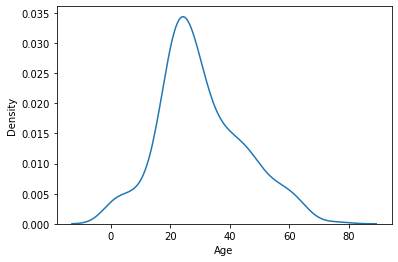

In [ ]:
sns.distplot(data['Age'],hist=False)

In [ ]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId   -0.012054
Survived       0.485607
Pclass        -0.279947
Age            0.457361
SibSp          3.564647
Parch          2.782493
Fare           3.294238
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


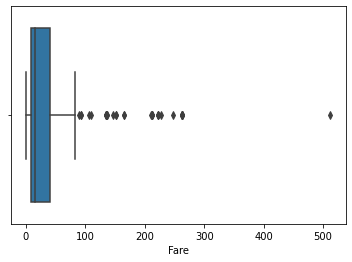

In [ ]:
sns.boxplot(data['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


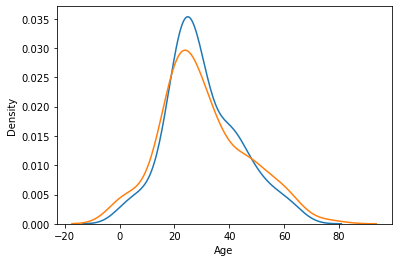

In [ ]:
sns.distplot(data[data['Survived']==0]['Age'],hist=False)
sns.distplot(data[data['Survived']==1]['Age'],hist=False)

In [ ]:
pd.crosstab(data['Pclass'],data['Survived'])

Survived,0,1
Pclass,,
1,50,48
2,59,29
3,96,50


In [ ]:
pd.crosstab(data['Sex'],data['Survived'])

Survived,0,1
Sex,,
female,0,127
male,205,0


In [ ]:
pd.crosstab(data['SibSp'],data['Survived'])

Survived,0,1
SibSp,,
0,145,69
1,47,50
2,6,5
3,3,1
4,3,1
5,0,1
8,1,0


In [ ]:
data['SibSp'].value_counts()

0    214
1     97
2     11
3      4
4      4
5      1
8      1
Name: SibSp, dtype: int64

In [ ]:

data['Parch'].value_counts()

0    247
1     50
2     29
3      3
4      1
6      1
5      1
Name: Parch, dtype: int64

In [ ]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

In [ ]:
def one_hot_encode(df,column):
    one_hot=pd.get_dummies(df[column]).add_prefix(f'{column}_')
    df=df.drop(column ,axis=1)
    df=df.join(one_hot)
    return df
df2=data.copy()
columns=['Pclass','Sex','SibSp','Parch','Embarked']
for col in columns:
    df2=one_hot_encode(df2, col)
df2.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,892,0,"Kelly, Mr. James",34.5,330911,7.8292,NaN,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,NaN,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,894,0,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,NaN,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,895,0,"Wirz, Mr. Albert",27.0,315154,8.6625,NaN,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,NaN,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [ ]:

df2.shape

(332, 29)

In [ ]:
df3=df2.drop(['Name','Cabin','Ticket'],axis=1)
df3.columns

Index(['PassengerId', 'Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
from pandas.tseries.offsets import YearEnd
X=df3.drop(['Survived'],axis=1)
Y=df3['Survived']

In [ ]:
X

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,7.8292,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
1,893,47.0,7.0000,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,894,62.0,9.6875,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
3,895,27.0,8.6625,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,896,22.0,12.2875,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3.0,13.7750,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
411,1303,37.0,90.0000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
412,1304,28.0,7.7750,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
414,1306,39.0,108.9000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 332, dtype: int64

**DECISION CLASSIFIER**

**The Gini coefficient** measures the inequality among values of a frequency distribution, such as the levels of income

[Text(0.5, 0.75, 'X[6] <= 0.5\ngini = 0.462\nsamples = 249\nvalue = [159, 90]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 159\nvalue = [159, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 90\nvalue = [0, 90]')]

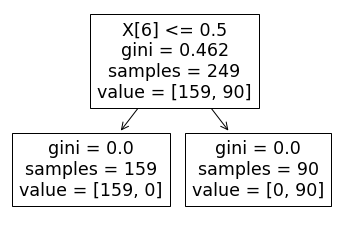

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y)
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
DecisionTreeClassifier()
from sklearn.tree import plot_tree
plot_tree(clf)

In [ ]:
clf.feature_importances_

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

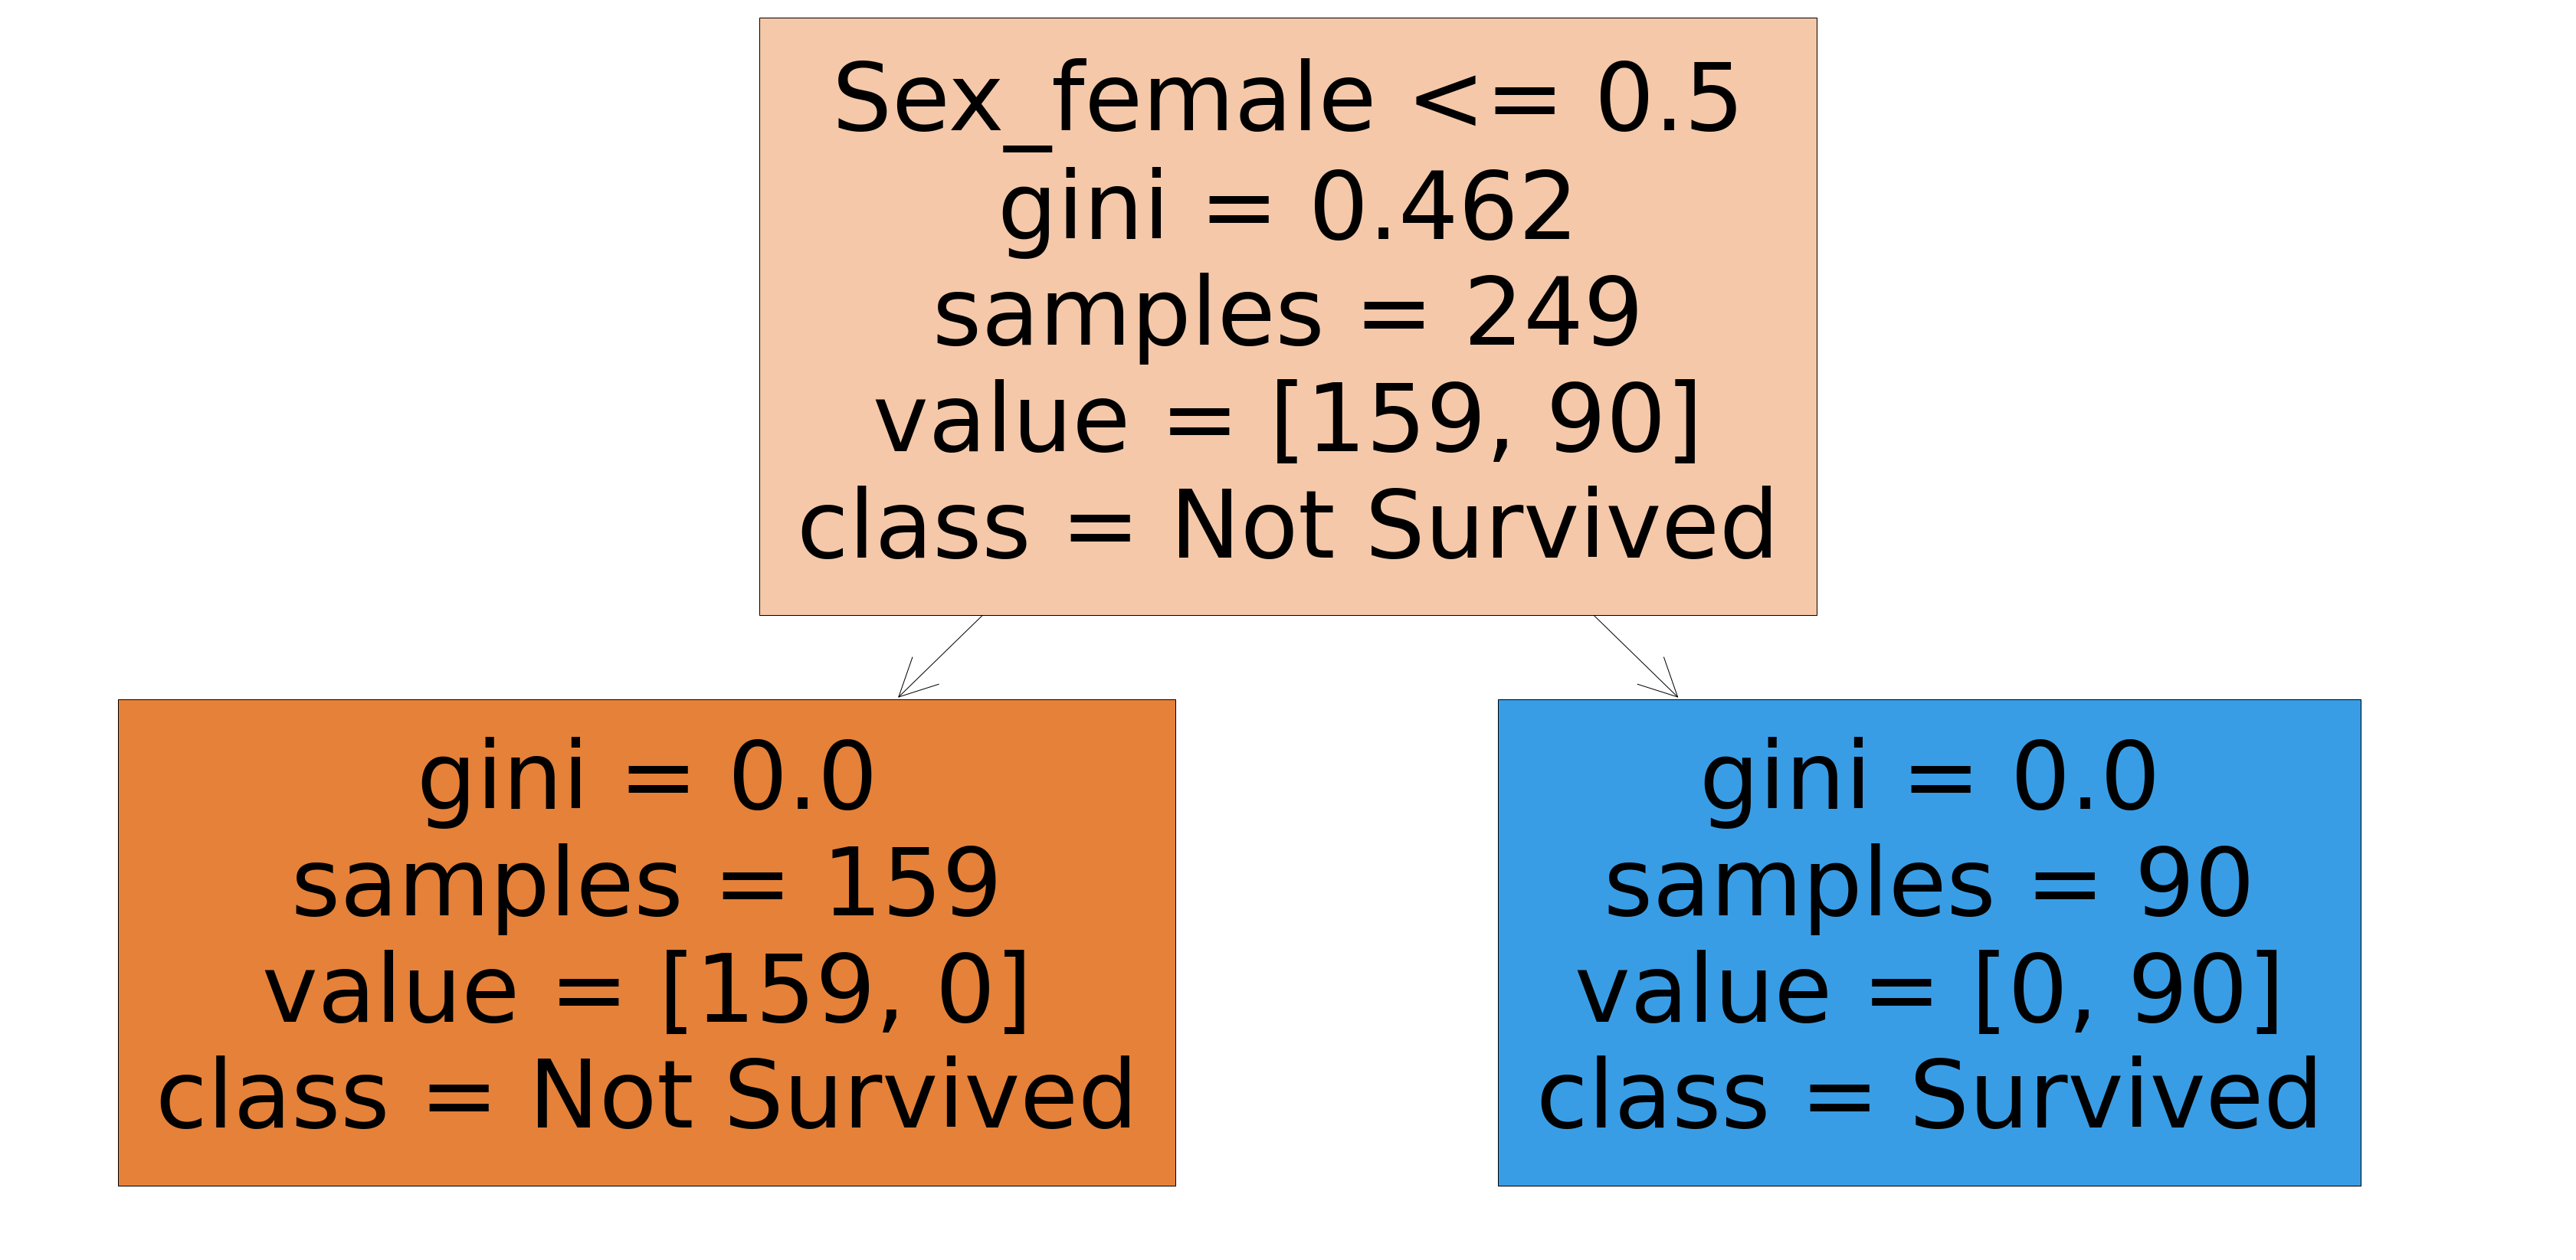

In [ ]:
attribute_names=X.columns
label_names=np.array(["Not Survived", "Survived"])
fig = plt.figure(figsize=(60,30))
plot_tree(clf, 
                   feature_names =attribute_names,  
                   class_names=label_names,
                   filled=True)
plt.show()